# Curve Fitting

Data may be described by a *mathematical function*. Finding the best-fit function and *parameters* for a set of data is called *curve fitting*. In general, using a function generated from curve fitting in order to describe some process, whether it is physical, biological, social, economical, etc., is called *emperical modeling.* The mathematical function found for the best-fit curve is often called the **mathemtical model** or **emperical model**.

Shiflet and Shiflet, in *Introduction to Computational Science*, say, "An emperical model is based only on data and is used to predict, not explain a system. An emperical model consists of a function that captures the trend of the data." (Boldfaced font is included in the quote.)

Before we start, import the necessary packages.

In [1]:
import numpy as np #used for arrays and numerical functions
import pandas as pd #used for reading a data file
import matplotlib.pyplot as plt #used for graphing
from scipy.optimize import curve_fit #used for curve fitting

# Fitting data manually

Chemists use Beer's Law to measure concentration of a solution based on its absorbance of light. (Read [this brief tutorial](http://www.chem.ucla.edu/~harding/IGOC/B/beers_law.html) that includes photos as a demonstration of the principle.) 

Read the file `absorbance-grape.txt` and plot the absorbance (in arbitrary units) vs. concentration in grams per liter. Manually find the parameters for a linear curve fit. (Data is from Dr. Pam Knippenburg, HPU Department of Chemistry. Students in the introductory chemistry lab mix different concentrations of grape Kool-Aid and measure the absorbance of light by the Kool-Aid.)

Fit the data with a linear model of the form:

$y = mx + b$

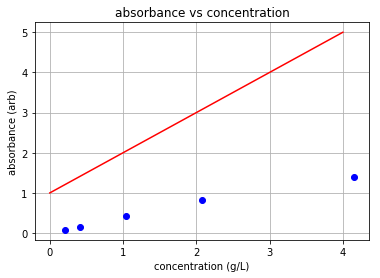

In [2]:
# create a Python function that contains the mathematical model for our fit
#x can be a single value or an array for the dependent variable
#  m, b are the fit parameters
def model(x, m, b):
    y =  m*x + b
    return y

# read the data file
df = pd.read_csv('https://github.com/atitus/STLinATL/raw/master/workshop2/05-curve-fitting/absorbance-grape.txt', sep='\t')

# define arrays for the data
xdata = df['concentration (g/L)']
ydata = df['absorbance (arb)']

# define constants and create points for a linear function
# m and b are initial guesses
m = 1
b = 1
xfit = np.linspace(0,4,100) # dependent variable used for drawing a best-fit curve
yfit = model(xfit, m, b) # independent variable used for drawing a best-fit curve

# plot data and the best-fit function on the same graph
fig = plt.figure()
plt.title("absorbance vs concentration")
plt.xlabel('concentration (g/L)')
plt.ylabel('absorbance (arb)')
plt.grid(which='both', axis='both')
plt.plot(xdata, ydata, 'bo')
plt.plot(xfit, yfit, 'r-')
plt.show()


## Exercise - Adjusting Parameters Manually

In the program above, look for the variables `m` and `b`. Adjust the values of these variables until the line fits the data as closely as possible. What did you find for the best-fit values of the slope and intercept?

# Fitting data numerically to a polynomial

Numpy has a function `polyfit()` that will compute the fit parameters to a [polynomial](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) of the form

$$y = p[0]x^n + p[1]x^{n-1} + \cdots + p[n-1]x + p[n]$$

where the highest exponent is $n$ and `p` is an array of fit parameters. Here is an example of a linear fit of the form $y=mx+b$ for the Beer's Law data. Notice that the fit parameters are returned as `m` and `b` in that order.

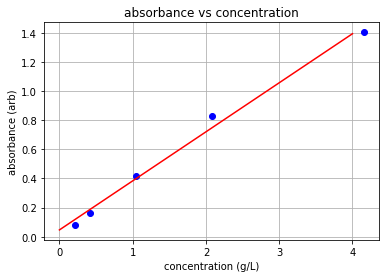

In [7]:
# create a Python function that contains the mathematical model for our fit
#x can be a single value or an array for the dependent variable
#  m, b are a comma separated list of fit parameters
def model(x, m, b):
    y =  m*x + b
    return y

# read the data file
df = pd.read_csv('https://github.com/atitus/STLinATL/raw/master/workshop2/05-curve-fitting/absorbance-grape.txt', sep='\t')

# define arrays for the data
xdata = df['concentration (g/L)']
ydata = df['absorbance (arb)']

#find the best-fit parameters and calculate a set of points for plotting the best-fit curve
m,b = np.polyfit(xdata,ydata,1) #1st degree polynomial
xfit = np.linspace(0,4,100) # dependent variable used for drawing a best-fit curve
yfit = model(xfit, m, b) # independent variable used for drawing a best-fit curve

# plot data and the best-fit function on the same graph
fig = plt.figure()
plt.title("absorbance vs concentration")
plt.xlabel('concentration (g/L)')
plt.ylabel('absorbance (arb)')
plt.grid(which='both', axis='both')
plt.plot(xdata, ydata, 'bo')
plt.plot(xfit, yfit, 'r-')
plt.show()


## Exercise - Using a Graph to Answer a Question

What is the absorbance at a concentration of 5 g/L? Change the upper limit of `xfit` and use the graph to answer the question.

## Exercise - Ball Rolling on a Track

In this experiment, a ball rolls on a track with constant velocity.

![](uniform-motion-ball-fast-main.gif)

The x-position of the ball is measured at the times indicated by red markers in the animated gif. The data for x-position and time are in the file `x-t-ball.txt`.

In the cell below, you will write a program to fit the data with a linear model of the form:

$x(t) = mt + b$

where $m$ is the slope and represents the x-velocity of the ball and $b$ is the initial position of the ball at $t=0$. Note that $t$ is the independent variable (on the horizontal axis) and x-position is the dependent variable (on the vertical axis).

What did you find for the slope and intercept? 

Start with the program below that reads the file and assigns the time data to the array `xdata` and the x-position data to the array `ydata`. Then, copy and paste code from the previous program and edit lines as needed

The best-fit line should look like this.

<img src="x-t-ball-best-fit.png" width=400>

In [8]:
# create a Python function that contains the mathematical model for our fit
#x can be a single value or an array for the dependent variable
#  m, b are a comma separated list of fit parameters
def model(x, m, b):
    y =  m*x + b
    return y

# read the data file
df = pd.read_csv('https://github.com/atitus/STLinATL/raw/master/workshop2/05-curve-fitting/x-t-ball.txt', sep='\t')
print(df.head())

# define arrays for the data
xdata = df['time (s)']
ydata = df['x-position (m)']

#find the best-fit parameters and calculate a set of points for the best-fit curve

# plot the data and best-fit curve on the same axes with a proper title, x-axis label, and y-axis label


   time (s)  x-position (m)
0     0.000          -0.803
1     0.334          -0.629
2     0.667          -0.454
3     1.001          -0.273
4     1.335          -0.102


# Exercise - Global Temperature Anomaly

This exercise will lead you through comparing a linear and quadratic model.

## Problem

To acertain long-scale changes in Earth's average temperature over time, scientists plot the **global surface temperature anomaly**. In this joint press release by NASA and NOAA on Jan. 18, 2018, [Long-Term Warming Trend Continued in 2017](https://www.giss.nasa.gov/research/news/20180118/), scientists "concluded that 2017 was the third-warmest year in their record." The [data and methodology](https://data.giss.nasa.gov/gistemp/) are provided to the public.

[According to NOAA](https://www.ncdc.noaa.gov/monitoring-references/faq/anomalies.php), "the term temperature anomaly means a departure from a reference value or long-term average. A positive anomaly indicates that the observed temperature was warmer than the reference value, while a negative anomaly indicates that the observed temperature was cooler than the reference value."

The reference for this anomaly data is the average temperature during the period 1951 - 1980. Sometimes the 20th century average global surface temperature is used. Then in this case, a positive anomaly is warmer than the 20th century average. A negative anomaly is cooler than the 20th century average. NOAA points out that the reference period does not "change the shape of the time series or affect the trends within it."

## Linear Model

(1) Fit a linear function to the global surface temperature anomaly as a function of year from the file `global-surface-temperature.txt`. The model is:

$$T = my + b$$

where $T$ is the global surface temperature anomaly and $y$ is the year. Print the best-fit parameters: $m$ and $b$, and plot the best fit curve with the data. You should appropriately title the graph, label the axes, and indicate what is plotted with a legend. The program below reads the data file. Add code to find and plot the best-fit curve along with the data.

(2) Based on the linear function, how much is the global surface temperature anomaly increasing per year? Why is this called an *average* increase in temperature?

In [9]:
# create a Python function that contains the mathematical model for our fit
#x can be a single value or an array for the dependent variable
#  m, b are a comma separated list of fit parameters
def model(x, m, b):
    y =  m*x + b
    return y

# read the data file
df = pd.read_csv('https://github.com/atitus/STLinATL/raw/master/workshop2/05-curve-fitting/global-surface-temperature.txt', sep='\t')
print(df.head())

# define arrays for the data
xdata = df['Year']
ydata = df['Global Temperature Anomaly (deg C)']

#find the best-fit parameters and calculate a set of points for the best-fit curve

# plot the data and best-fit curve on the same axes with a proper title, x-axis label, and y-axis label


   Year  Global Temperature Anomaly (deg C)
0  1880                               -0.19
1  1881                               -0.10
2  1882                               -0.10
3  1883                               -0.19
4  1884                               -0.29


## Quadratic Model

Using the same data set from `global-surface-temperature.txt`:

(1) Fit a quadratic function of the form

$$T = ay^2 + by + c$$

Print the best-fit parameters and plot the data and best-fit curve on the same graph.

(2) Why is the quadratic function a better fit than the linear function?

(3) Why is it much more worrisome for the quadratic function to fit the data (compared to the linear function)?

In [10]:
# create a Python function that contains the mathematical model for our fit
#x can be a single value or an array for the dependent variable
#  m, b are a comma separated list of fit parameters
def model(x, a, b, c):
    y =  a*x**2 + b*x + c
    return y

# read the data file
df = pd.read_csv('https://github.com/atitus/STLinATL/raw/master/workshop2/05-curve-fitting/global-surface-temperature.txt', sep='\t')
print(df.head())

# define arrays for the data
xdata = df['Year']
ydata = df['Global Temperature Anomaly (deg C)']

#find the best-fit parameters and calculate a set of points for plotting the best-fit curve
a,b, c = np.polyfit(xdata,ydata,2)
xfit = np.linspace(0,4,100) # dependent variable used for drawing a best-fit curve
yfit = model(xfit, a, b, c) # independent variable used for drawing a best-fit curve

# plot the data and best-fit curve on the same axes with a proper title, x-axis label, and y-axis label


   Year  Global Temperature Anomaly (deg C)
0  1880                               -0.19
1  1881                               -0.10
2  1882                               -0.10
3  1883                               -0.19
4  1884                               -0.29


# Fitting data numerically to any general model

Python can use a general algorithm to compute the best-fit parameters for a given mathematical function. It works for any mathematical model, not just polynomials. However, for simplicity, the program below fits data with a linear model.

The best-fit function is y=mx + b where m=0.3365 and b=0.0471.


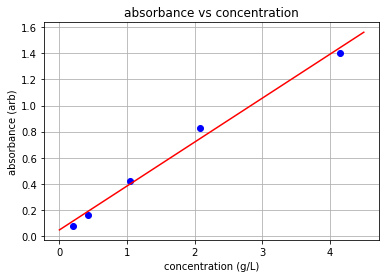

In [11]:
# create a Python function that contains the mathematical model for our fit
#x can be a single value or an array for the dependent variable
#  m, b are a comma separated list of fit parameters
def model(x, m, b):
    y =  m*x + b
    return y


# read the data file
df = pd.read_csv('https://github.com/atitus/STLinATL/raw/master/workshop2/05-curve-fitting/absorbance-grape.txt', sep='\t')
df.head()

# define arrays for the data
xdata = df['concentration (g/L)']
ydata = df['absorbance (arb)']

# find best-fit parameters
initial_guess = [1, 1] #initial guess of m, b
parameters, stats = curve_fit(model, xdata, ydata, p0=initial_guess)
m, b = parameters
print("The best-fit function is y=mx + b where m={:.4f} and b={:.4f}.".format(m,b))

# create a set of points using the best-fit parameters so we can plot the best-fit function
xfit = np.linspace(0,4.5,100)
yfit = model(xfit, m, b)

# plot data and the best-fit function on the same graph
fig = plt.figure()
plt.title("absorbance vs concentration")
plt.xlabel('concentration (g/L)')
plt.ylabel('absorbance (arb)')
plt.grid(which='both', axis='both')
plt.plot(xdata, ydata, 'bo')
plt.plot(xfit, yfit, 'r-')
plt.show()


## Exercise

Find and plot the best-fit linear function for brain weight vs. body weight of various mammals. Data is in the file `brain-weight-body-height.txt`. ([data source](https://people.sc.fsu.edu/~jburkardt/datasets/regression/x01.txt))

The program below defines the model, reads the data file, and finds the best-fit parameters. But it does not plot the data nor the best-fit function. Copy the appropriate code from a previous program and edit it to plot the data and best-fit function.

In [12]:
# create a Python function that contains the mathematical model for our fit
#x can be a single value or an array for the dependent variable
#  m, b are a comma separated list of fit parameters
def model(x, m, b):
    y =  m*x + b
    return y


# read the data file
df = pd.read_csv('https://github.com/atitus/STLinATL/raw/master/workshop2/05-curve-fitting/brain-weight-body-height.txt', sep='\t')
df.head()

# define arrays for the data
xdata = df['Body Weight (lbs)']
ydata = df['Brain Weight (lbs)']

# find best-fit parameters
initial_guess = [1, 1] #initial guess of m, b
parameters, stats = curve_fit(model, xdata, ydata, p0=initial_guess)
m, b = parameters
print("The best-fit function is y = mx + b where m={:.4f} and b={:.4f}.".format(m,b))


The best-fit function is y = mx + b where m=0.6425 and b=-12.5605.


# Fitting an exponential decay

## Discharging Capacitor

A capacitor stores electrical potential energy by having oppositely charged parallel plates. Like a battery, there is a voltage across the capacitor. When the capacitor is connected to a resistor, the voltage decreases as a function of time. (In contrast, a battery maintains a constant voltage for a fairly long time when it is connected to a resistor.)

In this experiment, an initially charged capacitor is connected to a resistor, like a light bulb. At $t=0$, the circuit is connected, and a voltmeter is used to measure the voltage across the capacitor at 10 s intervals.

![](discharging-capacitor.png)

Data for the voltage as a function of time is in the file `discharging-capacitor.txt`. Let's read and plot the data.

In [ ]:
df = pd.read_csv('https://github.com/atitus/STLinATL/raw/master/workshop2/05-curve-fitting/discharging-capacitor.txt', sep='\t')

xdata = df['t (min)']
ydata = df['V (volt)']

plt.title('Voltage across a discharging capacitor')
plt.xlabel('t (min)')
plt.ylabel('V (volt)')
plt.grid(which='both', axis='both')
plt.plot(xdata,ydata,'bo')
plt.show()

When we look at this data, we might think "Aha! This looks like exponential decay." But we don't know it's exponential decay unless we do a curve fit. Also, a curve fit can give us the parameters for the best-fit function if indeed it is exponential decay as we expect.

A general exponential function $y(x)$ has the form

$$y=y_0e^{-rx}$$

where $y$ is the dependent variable, x is the independent variable, $r$ is the decay constant, and $y_0$ is the value of $y$ at $x=0$--this is called the initial value of y.

We will begin by creating a Python function that takes an array of independent values called `x` and constants `y_0` and `r` and calculates the corresponding dependent values `y` using a mathematical function or *model*, $y(x)$ which is in this case an exponential. The rest of the program is similar to what we wrote for a linear curve fit, except we use the fit parameters `y0` and `r`.

In [ ]:
# create a Python function that contains the mathematical model for our fit
#x can be a single value or an array for the dependent variable
def model(x, y0, r):
    y =  y0*np.exp(-r*x)
    return y

# read the data file
df = pd.read_csv('https://github.com/atitus/STLinATL/raw/master/workshop2/05-curve-fitting/discharging-capacitor.txt', sep='\t')
df.head()

# define arrays for the data
xdata = df['t (min)']
ydata = df['V (volt)']

# find best-fit parameters
initial_guess = [1, 1] #initial guess of m, b
parameters, stats = curve_fit(model, xdata, ydata, p0=initial_guess)
y0, r = parameters
print("The best-fit function is y = y0*exp(-rx) where y0={:.4f} and r={:.4f}.".format(y0,r))

# create a set of points using the best-fit parameters so we can plot the best-fit function
xfit = np.linspace(0,2.5,100)
yfit = model(xfit, y0, r)

# plot data and the best-fit function on the same graph
fig = plt.figure()
plt.title("Discharging Capacitor")
plt.xlabel('t (min)')
plt.ylabel('V (volts)')
plt.grid(which='both', axis='both')
plt.plot(xdata, ydata, 'bo')
plt.plot(xfit, yfit, 'r-')
plt.show()


## Exercise

Read the [NIST DanWood data set](http://www.itl.nist.gov/div898/strd/nls/data/daniel_wood.shtml) from the file `DanWood.txt`. Calculate and graph best-fit curves using each of the following mathematical models.

  $$y=a_1+a_2x$$
  $$y=a_1+a_2x^2$$
  $$y=a_1+a_2x^3$$
  $$y=a_1+a_2x^4$$
  
  Which model is closest to fitting the data?

## Exercise

For the previous exercise with the DanWood data set, do a curve fit with the model

  $$y=a_1+a_2x^n$$
  
  where $n$ is a fit parameter, and let scipy's `curve_fit()` funtion find the value of $n$ that best fits the data. Compare your results to those reported [at NIST](http://www.itl.nist.gov/div898/strd/nls/data/LINKS/v-daniel_wood.shtml).